# 1. Import modules and load MERFISH data 

In [1]:
import numpy as np
import pandas as pd
#import seaborn as sns
#import anndata
#import scanpy as sc
import os, sys

import matplotlib.pyplot as plt

#sc.settings.n_jobs = 24
#sc.settings.set_figure_params(dpi=180, dpi_save=300, frameon=False, figsize=(4, 4), fontsize=8, facecolor='white')


In [2]:
print(os.getpid())
sys.path.append(r'C:\Softwares\Github\MerScope01')
from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

33644


In [25]:
merlin_output_folder = r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\MERFISH_analysis\20230622-4T1primary_C2'
#merlin_output_folder = r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\MERFISH_analysis\20230513-wtBrain_MO4'
# generate post-analysis folders
#postanalysis_folder = merlin_output_folder+'_PostAnalysis'
postanalysis_folder = os.path.join(merlin_output_folder, 'PostAnalysis')
if not os.path.exists(postanalysis_folder):
    print(f"Create postanalysis_folder: {postanalysis_folder}")
    os.makedirs(postanalysis_folder)
else:
    print(f"Use postanalysis_folder: {postanalysis_folder}")

Use postanalysis_folder: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\MERFISH_analysis\20230622-4T1primary_C2\PostAnalysis


# 2. Load MERLin decoding results

In [18]:
decode_folder = os.path.join(merlin_output_folder, 'Decode', 'images')


In [19]:
import tifffile

In [20]:
test_im = tifffile.imread(os.path.join(decode_folder, os.listdir(decode_folder)[10]))

<IPython.core.display.Javascript object>


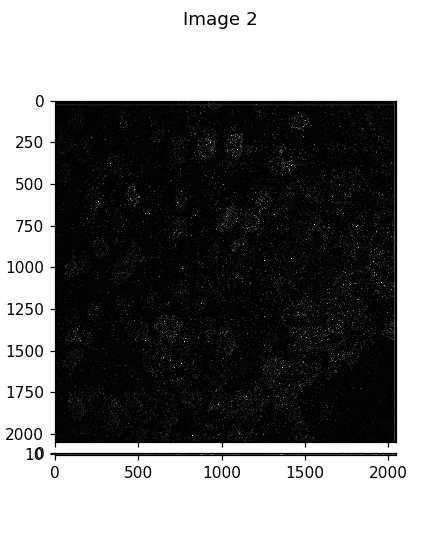

In [21]:
%matplotlib notebook
interactive.imshow_mark_3d([test_im[0::3],test_im[1::3],test_im[2::3]])

In [26]:
fiducial_folder = os.path.join(merlin_output_folder, 'FiducialCorrelationWarp', 'images')
test_fiducial_im = tifffile.imread(os.path.join(fiducial_folder, os.listdir(fiducial_folder)[10]))

<IPython.core.display.Javascript object>


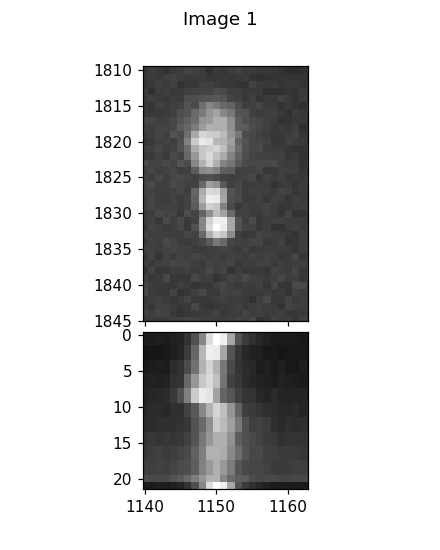

In [27]:
%matplotlib notebook
interactive.imshow_mark_3d([test_fiducial_im])

# Test fiducial correction parameters

In [28]:

from skimage import registration

In [31]:
registration.phase_cross_correlation(test_fiducial_im[0],test_fiducial_im[10],upsample_factor=100,normalization=None)[0]

array([10.7 , -0.18])

In [35]:
fiducial_output_folder = os.path.join(merlin_output_folder, 'FiducialCorrelationWarp', 'transformations')

test_transform = np.load(os.path.join(fiducial_output_folder, os.listdir(fiducial_output_folder)[10]),
                         allow_pickle=True)

In [36]:
test_transform

array([<SimilarityTransform(matrix=
           [[ 1., -0., -0.],
            [ 0.,  1., -0.],
            [ 0.,  0.,  1.]]) at 0x1aee6d2d210>,
       <SimilarityTransform(matrix=
           [[ 1., -0., -0.],
            [ 0.,  1., -0.],
            [ 0.,  0.,  1.]]) at 0x1aebedd09d0>,
       <SimilarityTransform(matrix=
           [[ 1.  , -0.  , -0.  ],
            [ 0.  ,  1.  , -0.01],
            [ 0.  ,  0.  ,  1.  ]]) at 0x1aebedf4100>,
       <SimilarityTransform(matrix=
           [[ 1.  , -0.  , -0.  ],
            [ 0.  ,  1.  , -0.01],
            [ 0.  ,  0.  ,  1.  ]]) at 0x1aeebd2a560>,
       <SimilarityTransform(matrix=
           [[ 1., -0., -0.],
            [ 0.,  1., -0.],
            [ 0.,  0.,  1.]]) at 0x1aeebd2a3e0>,
       <SimilarityTransform(matrix=
           [[ 1., -0., -0.],
            [ 0.,  1., -0.],
            [ 0.,  0.,  1.]]) at 0x1aeebd2b5b0>,
       <SimilarityTransform(matrix=
           [[ 1., -0., -0.],
            [ 0.,  1., -0.],
            